# 1.2 Control policies and open-loop control 

**2. Write a control policy to follow the shape in the Figure 1.2.
Implement the policy in the simulator.**

## Initial 2D simulator setup

In [2]:
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Perfect sensor

In [3]:
def sense(x):
    return x

### Euler integration

In [4]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [5]:
def control(t, y):
    ux = (-sin(t) - cos(2 * t)) / sqrt(2)
    uy = (-sin(t) + cos(2 * t)) / sqrt(2)
    return array([ux, uy])

### Running the simulator

In [15]:
tf = 2 * pi
Δt = 0.02    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([sqrt(2) / 2, sqrt(2) / 2])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

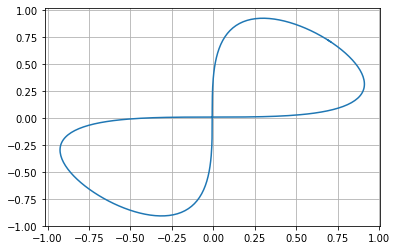

In [16]:
grid()
plot(x_log[:,0], x_log[:,1])

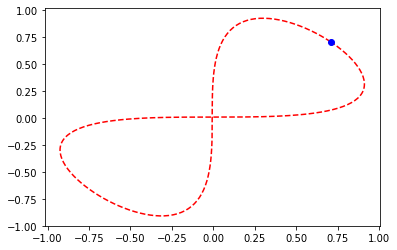

In [17]:
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())